<a href="https://colab.research.google.com/github/thatvernon-yes/TrainingArc/blob/main/Copy_of_ML_finals_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Car Carbon Dioxide Emission based on  its Performance Feature using Multiple Linear Regression and Random Forest Model




#Imports

In [671]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings as wrn
wrn.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import GradientBoostingRegressor




# Dataset File

In [672]:
df = pd.read_csv("Emissions.csv")

In [673]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [674]:
df.shape

(7385, 12)

In [675]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#Data Cleaning

##Remove duplicates

In [676]:
df.duplicated().sum()

1103

In [677]:
df[df.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM6,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A6,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS6,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M6,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS8,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M6,X,7.9,5.9,7.0,40,163


In [678]:
# remove duplicated data but keep the first one

df.drop_duplicates(keep='first', inplace=True)
df[df.duplicated()]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [679]:
df.duplicated().sum()

0

In [680]:
df.shape

(6282, 12)

##Handling Missing Data

In [681]:
df.isnull().values.any()

False

In [682]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [683]:
df.shape

(6282, 12)

##Renaming Columns

In [684]:
# rename columns

df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)

#Exploratory Data Analysis

##Statistics

In [685]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
fuel_cons_hwy,6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
fuel_cons_comb,6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
fuel_cons_comb_mpg,6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
co2,6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


##Data Visualization

###Make Column

In [686]:
len(df['make'].unique())

42

In [687]:
df['make'].unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

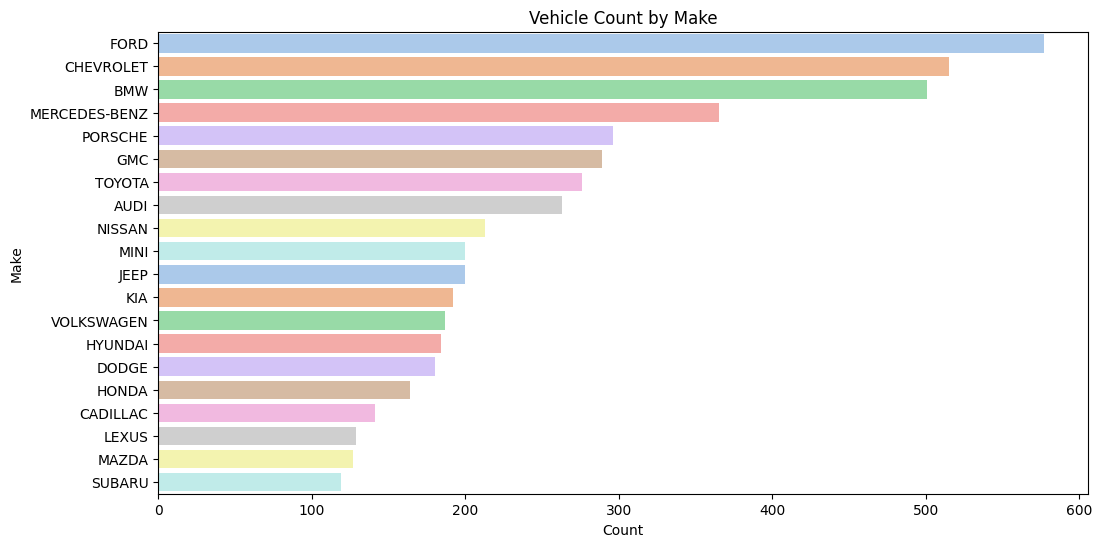

In [688]:
plt.figure(figsize=(12, 6))

# display the top 20 Makes

top_makes = df['make'].value_counts().head(20).index
sns.countplot(y='make', data=df, order=top_makes, palette="pastel")

plt.title('Vehicle Count by Make')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

###Model Column

In [689]:
df['model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

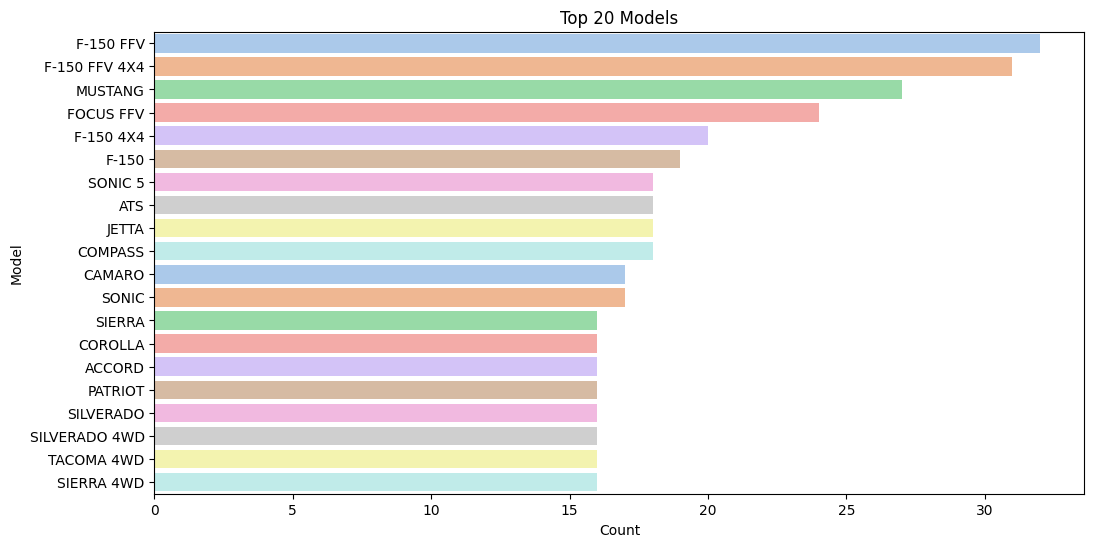

In [690]:
# display the top 20 Models base on entry count

top_models = df['model'].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(y=top_models.index, x=top_models.values, palette="pastel")
plt.title('Top 20 Models')
plt.xlabel('Count')
plt.ylabel('Model')
plt.show()

###Vehicle Class Column

In [691]:
df['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

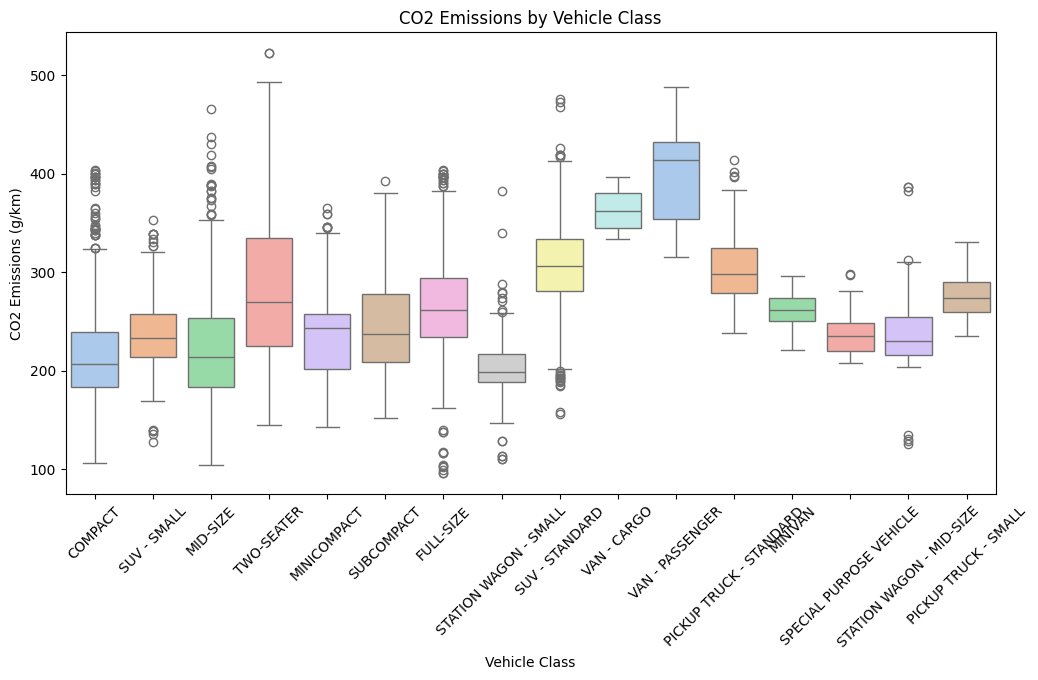

In [692]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions by Vehicle Class

sns.boxplot(x='vehicle_class', y='co2', data=df, palette="pastel")
plt.title('CO2 Emissions by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

###Engine Size Column

In [693]:
df['engine_size'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

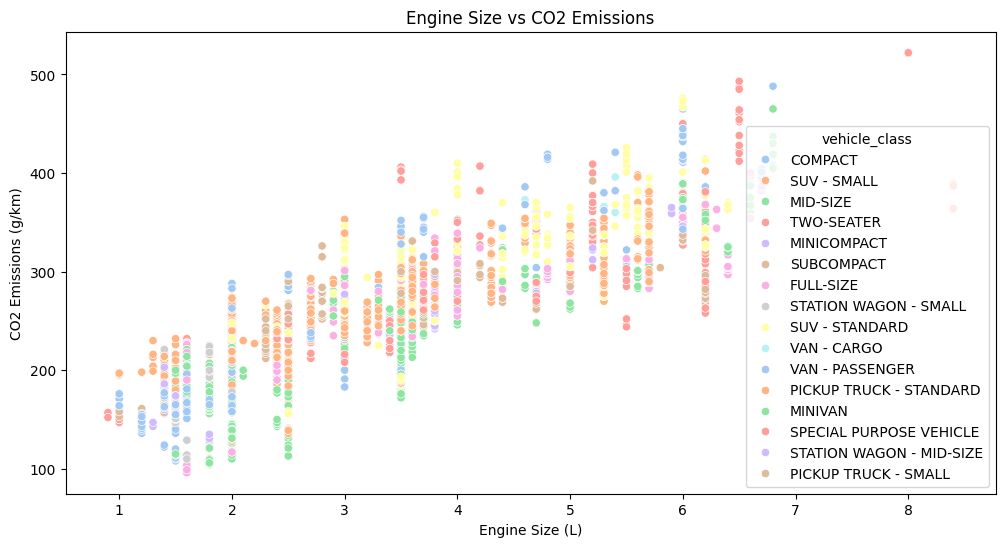

In [694]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Engine Size

sns.scatterplot(x='engine_size', y='co2', data=df, hue='vehicle_class', palette="pastel")
plt.title('Engine Size vs CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()


###Cylinders Column

In [695]:
df['cylinders'].value_counts()

,count
cylinders,
4,2749
6,2040
8,1202
12,135
3,88
10,40
5,26
16,2


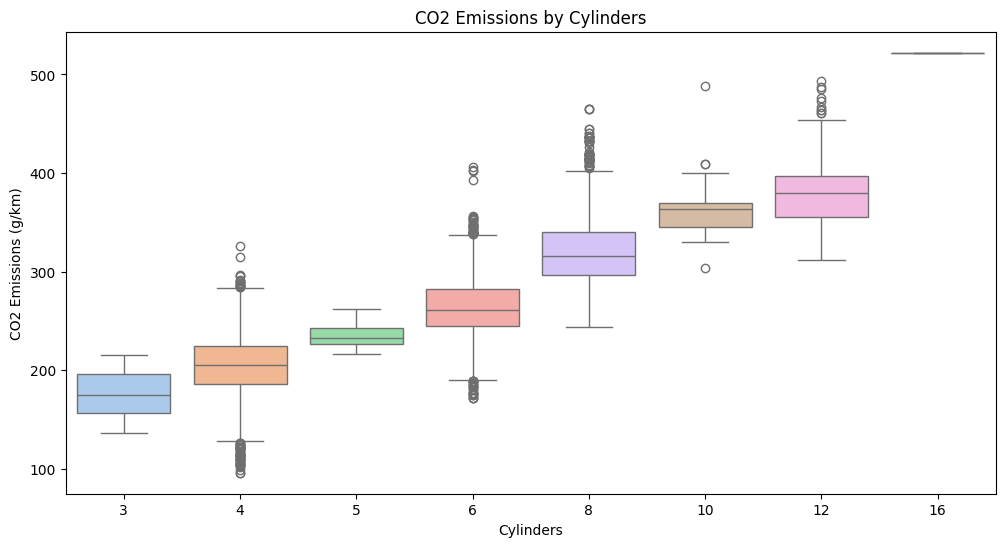

In [696]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Cylinders

sns.boxplot(x='cylinders', y='co2', data=df, palette="pastel")
plt.title('CO2 Emissions by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

###Transmission Column

In [697]:
df['transmission'].value_counts()

,count
transmission,
AS6,1139
AS8,1056
M6,773
A6,684
AM7,383
A8,378
AS7,283
A9,263
AV,241


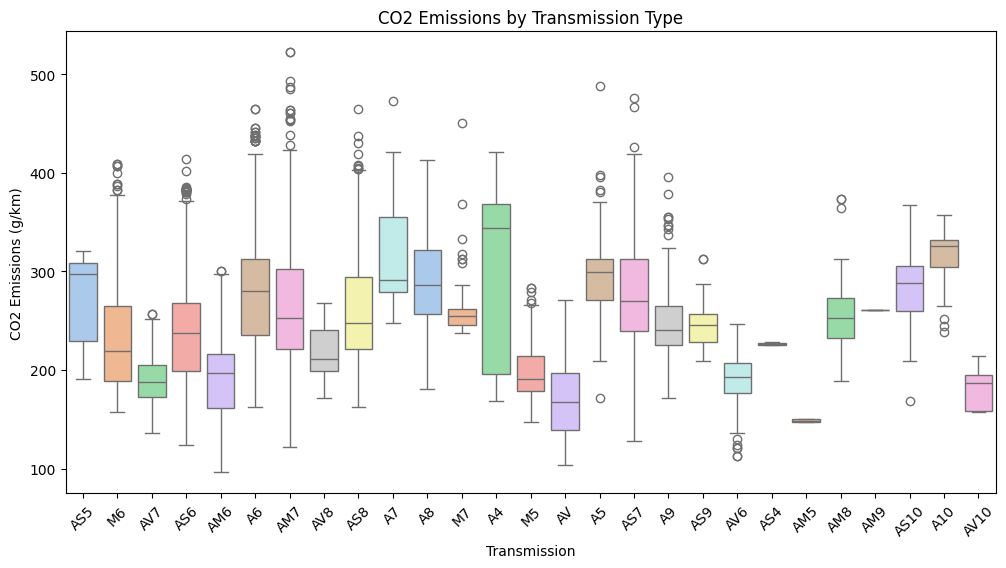

In [698]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Transmission
sns.boxplot(x='transmission', y='co2', data=df, palette="pastel")
plt.title('CO2 Emissions by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)
plt.show()

In [699]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


###Fuel Type Column

In [700]:
df['fuel_type'].value_counts()

,count
fuel_type,
X,3039
Z,2765
E,330
D,147
N,1


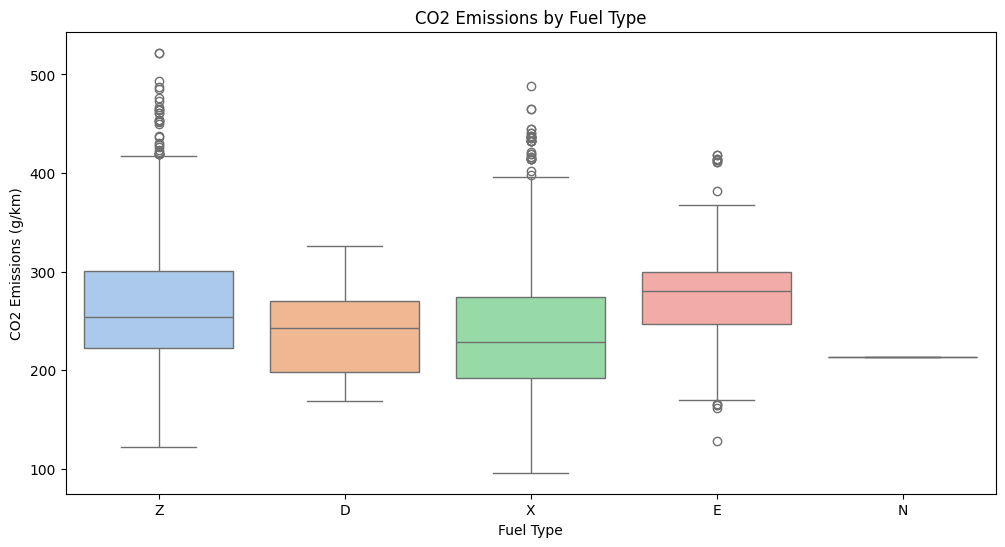

In [701]:
plt.figure(figsize=(12, 6))

# Display CO2 Emissions based on Fuel Type

sns.boxplot(x='fuel_type', y='co2', data=df, palette="pastel")
plt.title('CO2 Emissions by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

###CO2 Emmisions

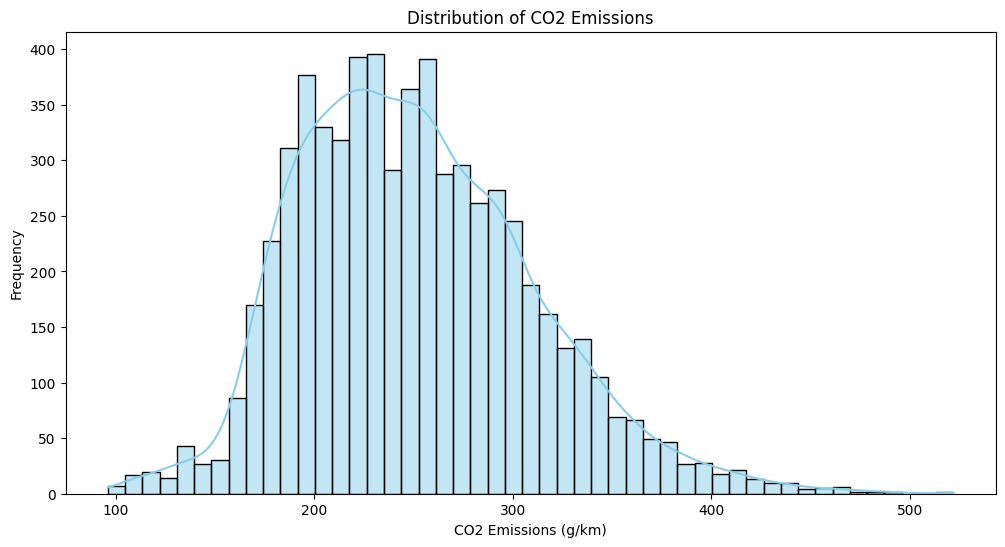

In [702]:
plt.figure(figsize=(12, 6))
sns.histplot(df['co2'], kde=True, color='skyblue')
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

###Pair plot

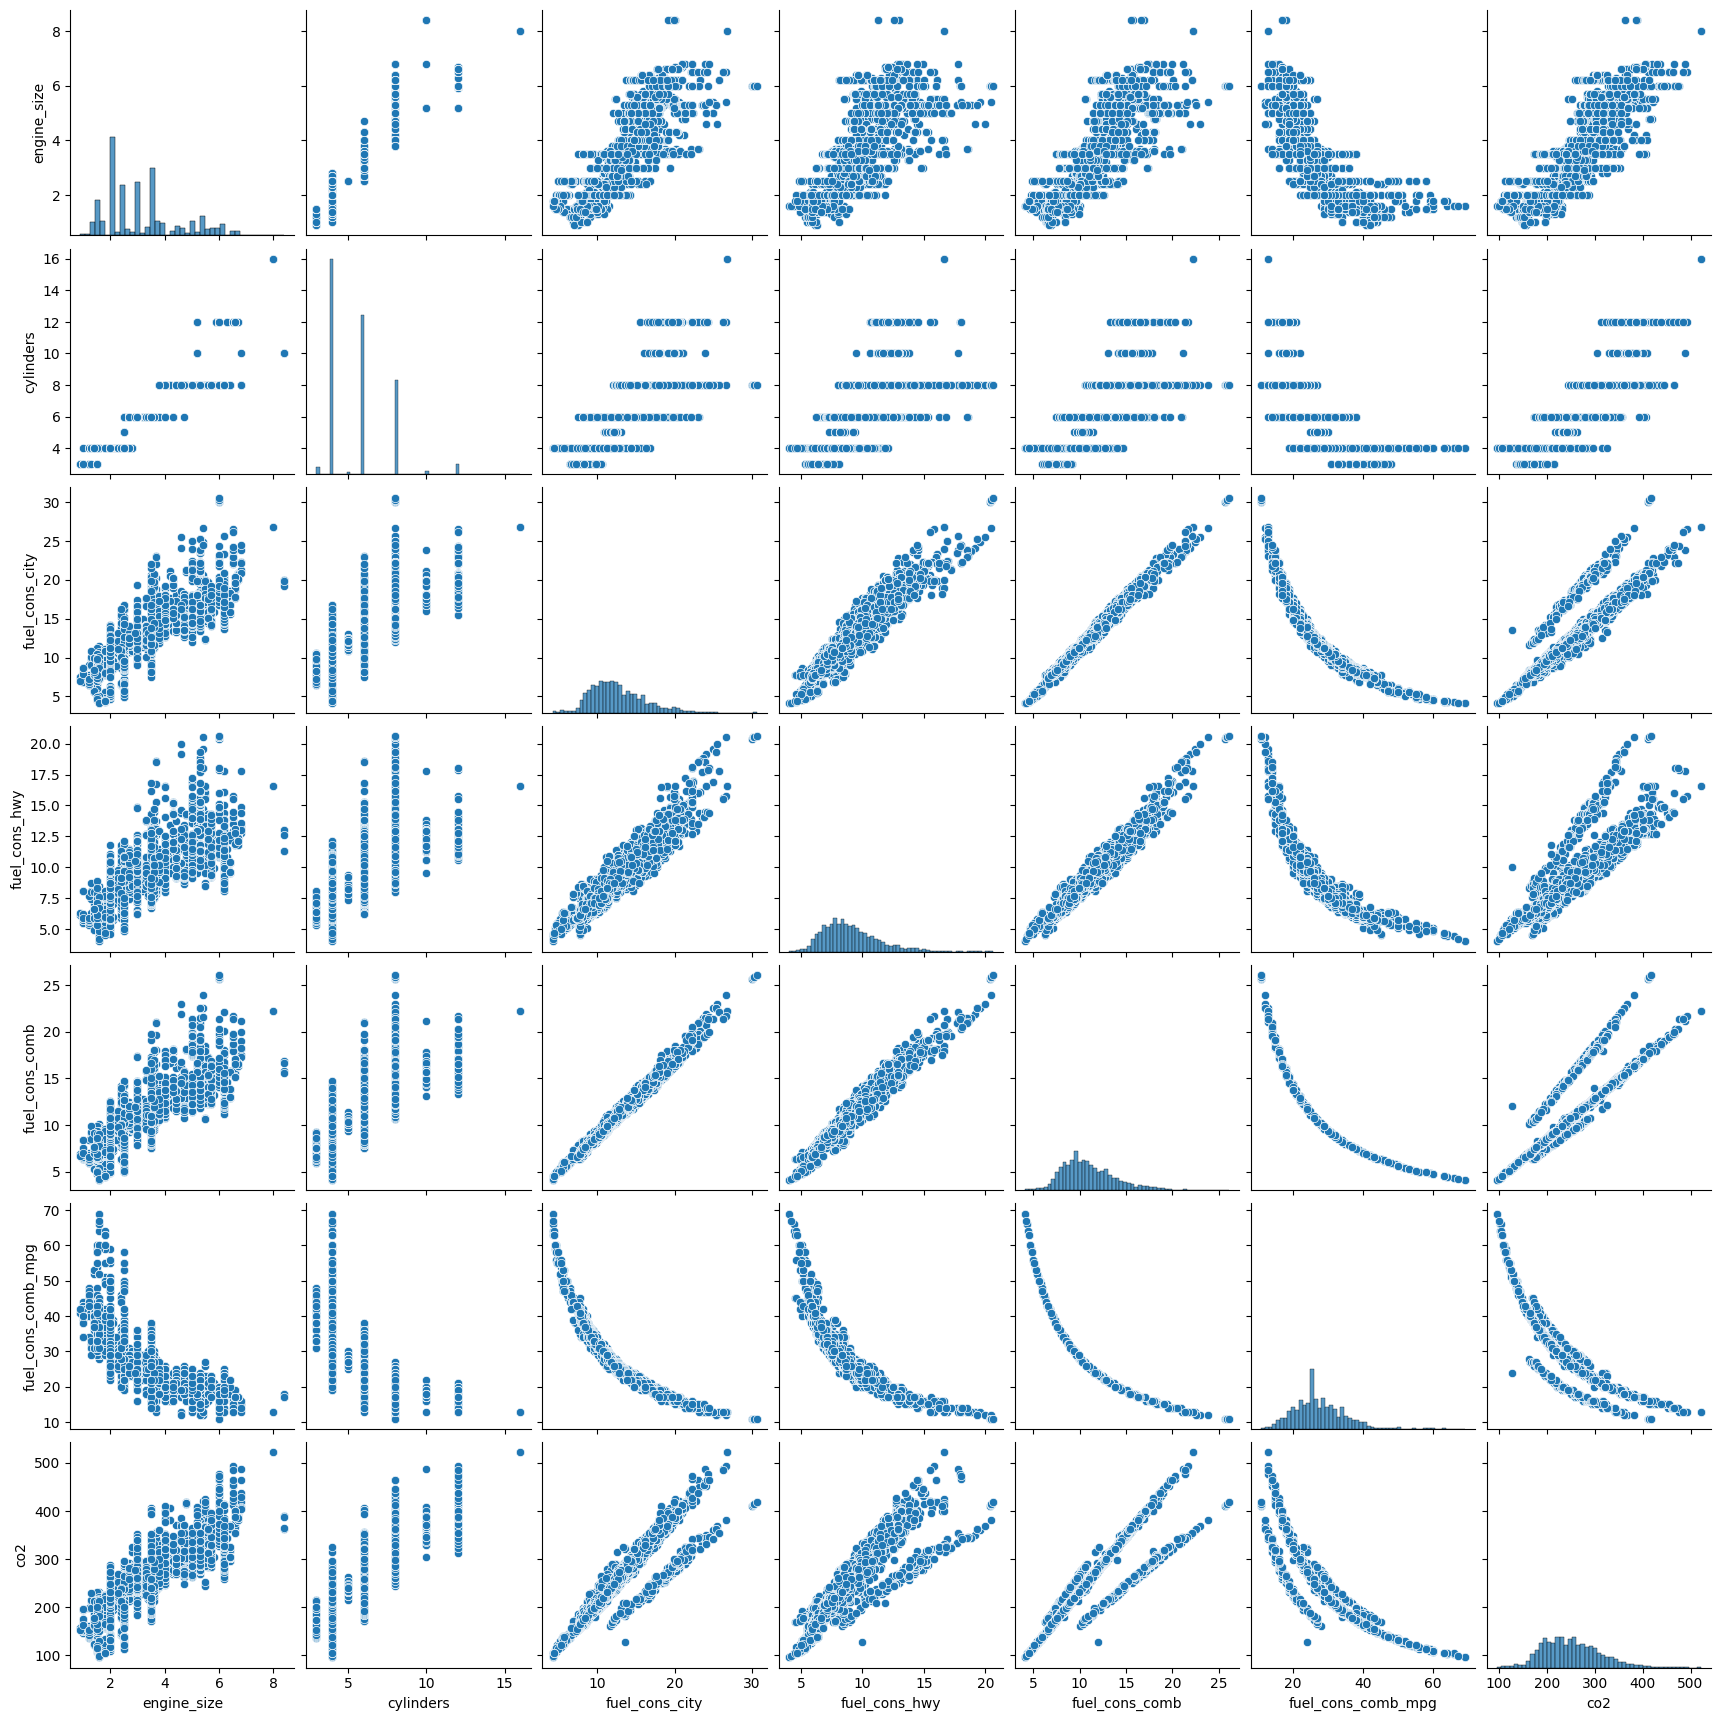

In [703]:
sns.pairplot(df)

#Train Models


## Pre-proccessing

In [705]:
score_list = {} #for saving score variables into it

In [706]:
# remove unimportant columns
df.drop(['make', 'model'], axis = 1, inplace = True)

In [707]:
label_encoder = LabelEncoder()

df['transmission'] = label_encoder.fit_transform(df['transmission'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['vehicle_class'] = label_encoder.fit_transform(df['vehicle_class'])


In [708]:
df.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,11,3.5,6,15,4,12.1,8.7,10.6,27,244


## Multiple Linear Regression

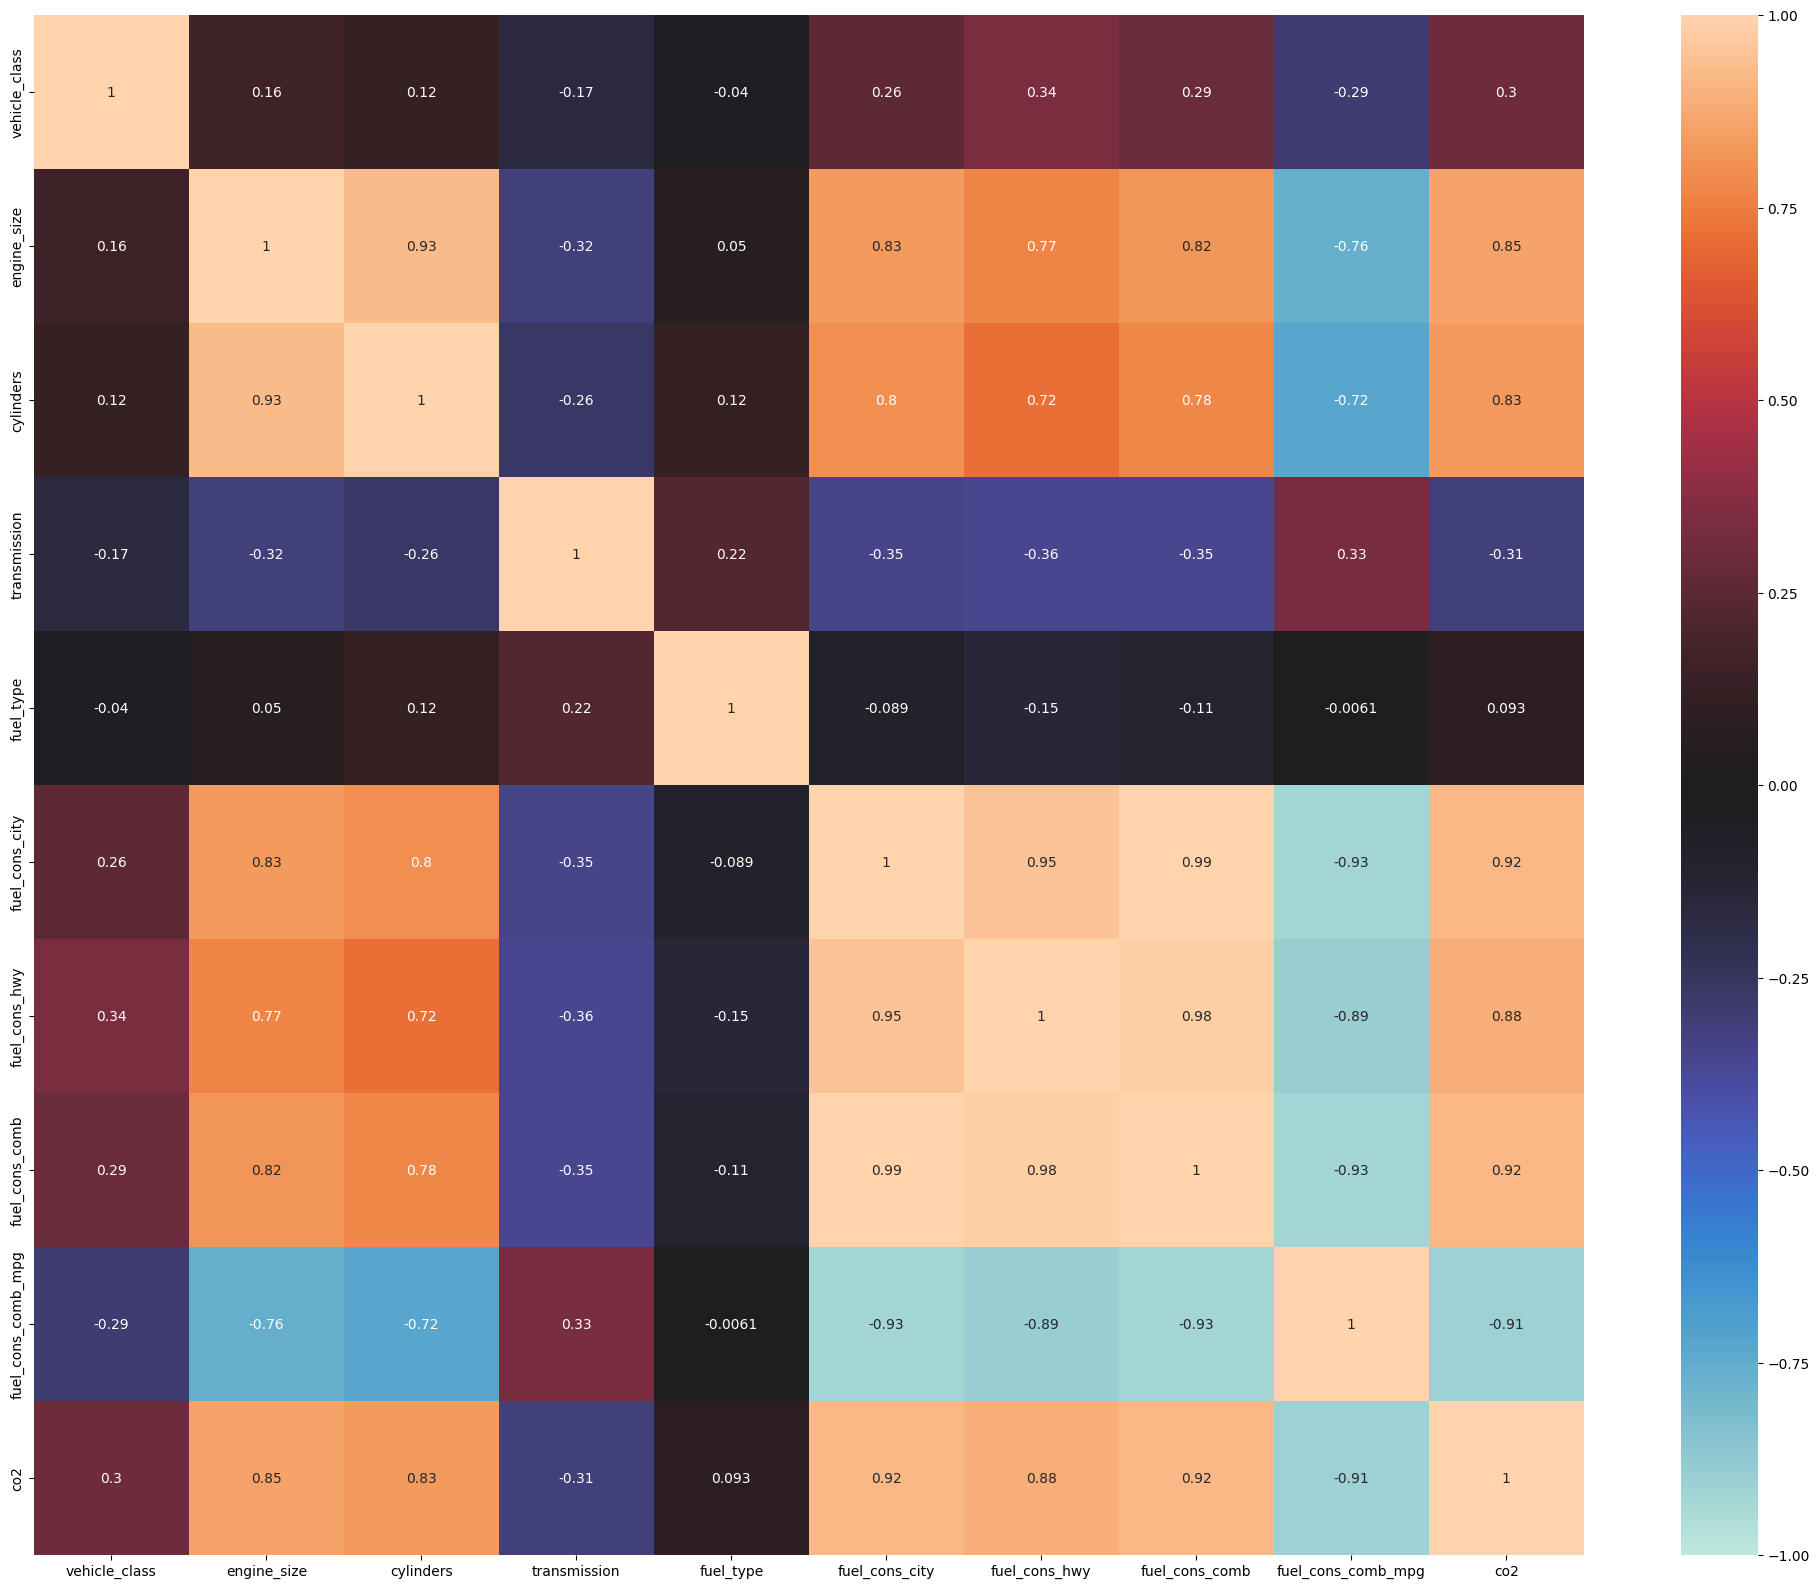

In [709]:
correlation = df.corr()
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [710]:
# remove the lowest score category base on heatmap
df.drop(['transmission', 'fuel_type','vehicle_class'], axis = 1, inplace = True)

In [711]:
X = df.drop(['co2'],axis=1)
y = df['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
mlr_model = LinearRegression()

In [ ]:
mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)

In [ ]:
#look for "imports" to see the import

olsmod = sm.OLS(y_test, X_test).fit()
olsmod.summary()

In [ ]:
olsmod.rsquared

In [ ]:
lr_score = mlr_model.score(X_test,y_test)
score_list["MLR"] = lr_score

print(f"Score is {lr_score}")

In [ ]:
# cross validation
scores = cross_val_score(mlr_model, X, y, cv=5)
scores

In [ ]:
mlr_model.predict([[2.4, 4, 10.6, 7.5, 9.2, 31]]) # approx. 212 CO2


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50,random_state=1)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_test,y_test)
score_list["RF"]=rfc_score

print(f"Score is {rfc_score}")

In [ ]:
# cross validation
scores = cross_val_score(rfc, X, y, cv=5)
scores

In [ ]:
rfc.predict([[2.4, 4, 10.6, 7.5, 9.2, 31]]) # approx. 212 CO2

##Gradient Boosting Regression

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=6, n_estimators=500, learning_rate=0.01)
gbrt.fit(X_train,y_train)
gbrt_score = gbrt.score(X_test,y_test)
score_list["gbrt"] = gbrt_score

print(f"Score is {gbrt_score}")

In [ ]:
scores = cross_val_score(gbrt, X, y, cv=5)
scores

In [ ]:
gbrt.predict([[2.4, 4, 10.6, 7.5, 9.2, 31]]) # approx. 212 CO2

#Compare all the performance of all classification models

In [ ]:
score_list = list(score_list.items())

In [ ]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")